In [1]:
import json
import time
import pandas as pd
from collections import Counter
import torch

import pandas as pd
import numpy as np
import nltk
import string
import re
import emoji
import torch
import json
import time
import numpy as np

from sklearn.utils import shuffle
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer

import numpy as np 
import pandas as pd 
from sklearn.cluster import KMeans 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances

import nltk
import string

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
from __future__ import unicode_literals, print_function, division
from io import open
import glob
import os

import unicodedata
import string

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
import json
import datetime


from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.cluster import AgglomerativeClustering
import statsmodels.api as sm
from patsy import dmatrices 

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

import seaborn

/Users/kathy908000/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

In [4]:
# Basic data files and paths
TOP_100_PATH = '../data/popular_100_memes.csv'
TOP_100 = pd.read_csv(TOP_100_PATH, encoding = "ISO-8859-1")
DATA_PATH = '../data/memes/'

STATS_PATH = '../data/statistics.json'  #statistics.json
with open(STATS_PATH, 'r') as f:
    STATS = json.load(f)
print(TOP_100.head())

          ID                   Name  \
0  112126428   Distracted Boyfriend   
1     438680  Batman Slapping Robin   
2   87743020            Two Buttons   
3  181913649    Drake Hotline Bling   
4      61579    One Does Not Simply   

                                     Alternate Names  
0  distracted bf, guy checking out another girl, ...  
1                                                NaN  
2  2 red buttons, choice button, which button, da...  
3  drakeposting, drakepost, drake hotline approve...  
4  one does not simply walk into morder, lord of ...  


In [5]:
memes_count = Counter(STATS['memes'])
print(len(STATS['memes']))
for f, c in memes_count.most_common():
    print(f)
    #print(f, c)

99
Bad-Luck-Brian.json
One-Does-Not-Simply.json
Philosoraptor.json
Boardroom-Meeting-Suggestion.json
Futurama-Fry.json
First-World-Problems.json
The-Most-Interesting-Man-In-The-World.json
Batman-Slapping-Robin.json
Bad-Pun-Dog.json
X-X-Everywhere.json
Expanding-Brain.json
Two-Buttons.json
But-Thats-None-Of-My-Business.json
Ancient-Aliens.json
Creepy-Condescending-Wonka.json
Grumpy-Cat.json
Y-U-No.json
The-Rock-Driving.json
That-Would-Be-Great.json
Waiting-Skeleton.json
Change-My-Mind.json
Leonardo-Dicaprio-Cheers.json
10-Guy.json
Captain-Picard-Facepalm.json
Matrix-Morpheus.json
Third-World-Skeptical-Kid.json
Confession-Bear.json
Am-I-The-Only-One-Around-Here.json
Success-Kid.json
Hide-the-Pain-Harold.json
Roll-Safe-Think-About-It.json
Evil-Toddler.json
Awkward-Moment-Sealion.json
Face-You-Make-Robert-Downey-Jr.json
Mocking-Spongebob.json
Disaster-Girl.json
Blank-Nut-Button.json
Dont-You-Squidward.json
Inhaling-Seagull.json
Back-In-My-Day.json
Grandma-Finds-The-Internet.json
Brace-Your

In [6]:
memes = []
for f, c in memes_count.most_common():
    memes.append(f)
    
selected_memes = memes

def open_data(path):
    with open(path, 'r') as f:
        data = json.load(f)
    return data

memes_data = [open_data(DATA_PATH + meme) for meme in selected_memes]   

In [7]:
# Preprocessing data for modelling
from nltk import sent_tokenize, word_tokenize
from gensim.models import Word2Vec

In [8]:
def parse_text(text):
    text = text.lower().strip()
    return word_tokenize(text)

def parse_blocks(blocks):
    result = []
    for i,b in enumerate(blocks):
        result.append(parse_text(b))
#         if i < len(blocks) - 1:
#             result.extend('|')
    return result

ex = parse_blocks(memes_data[0][0]['boxes'])
print(ex)
model = Word2Vec(ex, min_count=1)
print(model)

[['gets', 'covid', '19', 'and', 'recovers'], ['dies', 'from', 'complications', 'related', 'to', 'the', 'common', 'cold', '.']]
Word2Vec(vocab=14, size=100, alpha=0.025)


# Array of words

In [9]:
#for countvectorizer and tfidf kmeans
#each format is a element in array, string
allwords_memeformat = []

for i in range(len(memes_data)):
    eachformat_string = ''
    
    for ele in memes_data[i]:
        box = ele['boxes']
        
        string = ' '.join(box)
        eachformat_string = eachformat_string + ' ' + string
    
    allwords_memeformat.append(eachformat_string)

In [10]:
#6min to run
#for word2vec kmeans
allwords_memeformat2 = []
"""
example
sentences = [['this', 'is', 'the', 'one','good', 'machine', 'learning', 'book'],
            ['this', 'is',  'another', 'book'],
            ['one', 'more', 'book']]
"""

for i in range(len(memes_data)):
    eachformat_array= []
    
    for ele in memes_data[i]:
        #print("This is ele: " + str(ele))
        box = ele['boxes']
        
        string = ' '.join(box)
        eachformat_array = eachformat_array + parse_text(string)
        #eachformat_string = eachformat_string + ' ' + string
        #eachformat_string = eachformat_string + string
    
    allwords_memeformat2.append(eachformat_array)
len(allwords_memeformat2)

99

# Data Cleaning

In [11]:
import re
import nltk

In [12]:
#Topic Classification in Python
nltk.download('punkt')
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kathy908000/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kathy908000/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

#input text format
def process_text(text):
    # Make all the strings lowercase and remove non alphabetic characters
    text = re.sub('[^A-Za-z]', ' ', text.lower())

    # Tokenize the text; this is, separate every sentence into a list of words
    tokenized_text = word_tokenize(text)

    # Remove the stopwords and stem each word to its root
    clean_text = [
        stemmer.stem(word) for word in tokenized_text
        if word not in stopwords.words('english')
    ]

    return clean_text

In [15]:
cleanwords = [process_text(allwords_memeformat[0])]
"""
['get',
 'covid',
 'recov',
 'die',
 'complic']
 """

#cleanwords 

[['get',
  'covid',
  'recov',
  'die',
  'complic',
  'relat',
  'common',
  'cold',
  'plan',
  'start',
  'self',
  'employ',
  'job',
  'home',
  'fail',
  'job',
  'interview',
  'put',
  'hot',
  'pocket',
  'microwav',
  'arrest',
  'anim',
  'cruelti',
  'final',
  'get',
  'second',
  'lead',
  'role',
  'nicola',
  'cage',
  'movi',
  'see',
  'crush',
  'final',
  'find',
  'job',
  'tower',
  'window',
  'cleaner',
  'fear',
  'hieght',
  'walk',
  'around',
  'hood',
  'nerf',
  'gun',
  'extradit',
  'guantanamo',
  'bay',
  'charg',
  'terror',
  'start',
  'busi',
  'got',
  'fire',
  'denni',
  'read',
  'backward',
  'spell',
  'sin',
  'surviv',
  'plane',
  'crash',
  'and',
  'mountain',
  'goe',
  'search',
  'help',
  'rescu',
  'starv',
  'tribe',
  'cannib',
  'offend',
  'peopl',
  'hold',
  'non',
  'alcohol',
  'fruiti',
  'ultra',
  'organ',
  'sustain',
  'grown',
  'beverag',
  'brian',
  'find',
  'old',
  'lamp',
  'rub',
  'geni',
  'grant',
  'one',
 

In [16]:
#array of words for kmeans clustering 
#takes 15min to run
cleanword_memeformat = []
cleanword_memeformat_word = []
for i in range(len(allwords_memeformat)):
    cleanword_memeformat.append(' '.join(process_text(allwords_memeformat[i])))  #tfidf, kmeans clustering
   
    
    

# Most Frequent Words

In [21]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer( stop_words=["all","in","the","is", "and", "a", "to", "at", "for", "that", "of", "are", "was", "on", "it", "be"]).fit(corpus)
    #vec = CountVectorizer(max_df=0.5, min_df = 1).fit(corpus)
    
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [105]:
#frequent words in all memes 
allwords_formatcombined = ' '.join(cleanword_memeformat)
common_words = get_top_n_words([allwords_formatcombined], 250) #input should be an array not a string
for word, freq in common_words:
    print(word, freq)

get 51971
meme 47524
one 47324
make 34394
like 32981
say 26527
peopl 24692
go 23618
simpli 20419
day 18048
time 16777
would 16473
want 16367
see 16292
know 16101
tell 16076
got 15911
alway 15268
look 14689
need 14125
think 14022
use 13665
come 12913
call 12845
back 12654
wait 12400
good 12298
take 12263
new 12225
friend 12149
told 11860
someon 11754
said 11468
play 11366
trump 11098
great 10268
life 10147
game 10132
year 10118
everyon 10035
could 9801
mom 9685
eat 9559
stop 9494
work 9459
right 9452
school 9300
ask 9148
tri 9146
give 9081
sure 9071
put 8768
still 8658
kid 8563
die 8473
watch 8438
guy 8436
face 8198
kill 8175
girl 8120
let 7920
imgflip 7788
first 7538
busi 7537
find 7247
never 7241
upvot 7192
fortnit 7157
bill 7100
oh 6981
none 6843
love 6780
world 6756
bad 6710
realli 6662
thing 6633
dont 6595
man 6517
everywher 6505
mean 6412
made 6372
someth 6370
teacher 6317
talk 6237
start 6230
nobodi 6167
around 6126
idea 6051
alien 6022
im 6003
better 5886
post 5757
buy 5692
care

In [57]:
for i in range(len(cleanword_memeformat)):
    print('\n')
    print("Meme format: " + str(i))
    common_words = get_top_n_words([cleanword_memeformat[i]], 25) #input should be an array not a string
    for word, freq in common_words:
        print(word, freq)



Meme format: 0
get 10092
goe 2196
meme 2145
make 1682
final 1496
first 1282
die 1266
day 1257
find 1249
girl 1093
one 1082
tri 1055
play 968
win 965
buy 952
say 872
time 821
ask 805
take 798
life 781
school 780
becom 772
luck 767
friend 766
still 760


Meme format: 1
one 21202
simpli 19696
meme 2820
without 2198
get 2001
make 1861
like 1035
bruh 955
go 938
say 924
eat 884
use 703
play 630
watch 617
take 535
walk 517
know 486
day 479
good 468
time 468
first 448
peopl 441
stop 402
look 384
imgflip 351


Meme format: 2
would 2132
make 1742
peopl 1655
call 1615
mean 1397
get 1329
say 1026
meme 974
one 814
like 765
go 719
still 708
time 683
eat 599
come 592
someon 587
think 569
made 550
use 514
life 455
know 451
wonder 449
day 437
person 431
man 412


Meme format: 3
need 6383
make 3887
idea 3564
new 3381
meme 2705
get 1901
game 1694
peopl 1610
ok 1552
like 1251
go 1244
alright 1216
guy 1163
let 1141
better 1054
good 1031
could 935
one 857
think 786
stop 770
trump 751
money 728
someth 714


got 146
mom 145
girl 140
tri 134
think 130


Meme format: 38
inhal 1112
get 472
see 447
meme 344
mom 296
fortnit 250
oh 232
like 224
say 221
wait 221
go 210
breath 210
die 205
look 199
hey 198
take 197
one 196
play 194
day 184
come 179
friend 164
na 164
make 155
someon 148
teacher 147


Meme format: 39
day 4409
back 4207
peopl 338
use 325
meme 314
call 297
get 278
like 229
kid 187
old 183
one 177
play 167
got 167
go 139
would 135
say 134
thing 130
game 129
want 119
make 114
actual 113
could 110
time 98
made 97
said 92


Meme format: 40
oh 356
meme 346
look 328
get 311
see 311
grandma 304
say 249
like 241
internet 225
one 189
find 189
comput 176
call 156
need 150
wait 149
go 144
new 142
want 139
day 133
know 131
googl 129
search 128
use 127
histori 119
thing 113


Meme format: 41
brace 4063
come 3353
meme 584
winter 179
post 161
day 153
trump 130
christma 125
go 113
new 108
school 107
year 96
peopl 94
one 90
get 89
prepar 83
season 81
war 80
back 76
time 73
last 66
like 65
fan 65
yourse

make 47
eat 47
time 46
see 43
mom 43
die 43
war 42
feel 40
day 38
peopl 37
friday 36
give 36


Meme format: 74
get 2831
everyon 391
everybodi 264
meme 196
upvot 166
like 119
go 77
free 71
car 69
final 66
new 65
school 59
day 56
life 54
one 52
got 50
love 50
die 50
test 48
gun 48
presid 45
say 44
oprah 44
tax 40
make 40


Meme format: 75
lie 1425
determin 660
said 616
say 477
detector 363
result 274
test 234
fact 203
claim 170
father 139
prove 113
meme 108
show 93
trump 88
go 87
would 85
ask 81
get 74
make 66
time 62
told 62
like 61
peopl 60
come 55
hillari 52


Meme format: 76
call 157
say 141
said 115
like 112
go 84
peopl 77
make 74
meme 67
get 64
laser 63
trump 59
one 56
right 55
friend 51
want 48
know 45
appar 44
ask 44
oh 42
new 41
sure 41
work 39
use 39
world 38
mean 37


Meme format: 77
right 1708
hot 1651
meme 315
peopl 52
make 42
like 42
trump 36
think 35
get 35
upvot 34
look 31
imgflip 29
go 29
polit 28
know 25
new 24
post 21
cold 21
say 21
comment 21
movi 20
day 19
call 19
so

# Kmeans with Word Embedding

In [ ]:
#use gensim word2vec model
from gensim.models import Word2Vec
  
from nltk.cluster import KMeansClusterer
import nltk
import numpy as np 
  
from sklearn import cluster
from sklearn import metrics
  
sentences = allwords_memeformat2
model = Word2Vec(sentences, min_count=1)

In [106]:
def sent_vectorizer(sent, model): 
    sent_vec =[]
    numw = 0
    for w in sent:
        try:
            if numw == 0:
                sent_vec = model[w]
            else:
                sent_vec = np.add(sent_vec, model[w])
            numw+=1
        except:
            pass
     
    return np.asarray(sent_vec) / numw
  


In [107]:
X=[]
for sentence in sentences:
    X.append(sent_vectorizer(sentence, model)) 
print(X)

/Users/kathy908000/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':
/Users/kathy908000/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


[array([-0.55309582,  0.242077  , -1.36569656, -0.37083993,  0.13148412,
       -0.5270054 , -0.38972683,  0.02631732, -0.40560877,  0.86221421,
        0.06004953,  0.42632142,  0.86233795,  0.49654345, -0.03312663,
        0.63831821, -0.65019459, -0.63221048,  0.0143187 ,  1.04375292,
        1.06585768, -0.63929506,  0.30587079,  0.67083603,  0.17881171,
       -0.52570847,  0.77942845, -0.37564369,  1.13468399,  0.4424494 ,
       -0.05715828,  0.14829748,  0.34839232, -0.3422112 , -0.30377607,
        0.56485724, -0.41421985, -0.20888511, -0.24541263,  0.09875248,
        0.213474  , -0.24674983,  0.02824304, -0.30928734, -0.01018317,
       -0.4013135 ,  0.07039728,  0.19109493,  0.19026126, -0.45261714,
       -0.18609208, -0.31350665, -0.07124965,  1.600685  ,  0.16866437,
        0.06433702,  0.01843876, -0.53203377,  0.75882758,  0.29698007,
       -0.4507684 , -0.22369299, -0.02239167, -0.52651893,  0.36934313,
        0.28617175,  0.18429504, -0.22146545, -0.3980415 ,  0.2

In [109]:
len(X) #X is 9*100 array each row is a sentence 
len(X[0]) 

100

In [110]:
print(model[model.wv.vocab])

/Users/kathy908000/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[[-1.145741    0.07056022 -2.5770411  ... -1.8465337  -1.109025
   0.9639268 ]
 [-0.10268366 -0.08290957 -0.21594408 ... -1.0328494   1.0536109
   0.8315366 ]
 [-0.06337792  0.0282276  -0.4090734  ... -1.0025383   0.9601366
   0.7599148 ]
 ...
 [-0.01051939 -0.00161668 -0.00196474 ... -0.00435669  0.00170176
   0.00332435]
 [ 0.0067833   0.00354718  0.01340498 ... -0.01255029  0.0096535
   0.0076422 ]
 [ 0.00355904  0.00389466 -0.00937841 ... -0.00718378  0.01117392
  -0.00356823]]


In [112]:
len(model.wv.vocab)

144391

In [22]:
class Kmeans:
    """ K Means Clustering
    
    Parameters
    -----------
        k: int , number of clusters
        
        seed: int, will be randomly set if None
        
        max_iter: int, number of iterations to run algorithm, default: 200
        
    Attributes
    -----------
       centroids: array, k, number_features
       
       cluster_labels: label for each data point
       
    """
    
    def __init__(self, k, seed = None, max_iter = 1000):
        self.k = k
        self.seed = seed
        if self.seed is not None:
            np.random.seed(self.seed)
        self.max_iter = max_iter
        
            
    
    def initialise_centroids(self, data):
        """Randomly Initialise Centroids
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        centroids: array of k centroids chosen as random data points 
        """
        
        initial_centroids = np.random.permutation(data.shape[0])[:self.k]
        self.centroids = data[initial_centroids]

        return self.centroids
    def assign_clusters(self, data):
        """Compute distance of data from clusters and assign data point
           to closest cluster.

        Parameters
        ----------
        data: array or matrix, number_rows, number_features

        Returns
        --------
        cluster_labels: index which minmises the distance of data to each
        cluster

        """

        if data.ndim == 1:
            data = data.reshape(-1, 1)

        dist_to_centroid =  pairwise_distances(data, self.centroids, metric = 'euclidean')
        self.cluster_labels = np.argmin(dist_to_centroid, axis = 1)

        return  self.cluster_labels
    
    
    def update_centroids(self, data):
        """Computes average of all data points in cluster and
           assigns new centroids as average of data points
        
        Parameters
        -----------
        data: array or matrix, number_rows, number_features
        
        Returns
        -----------
        centroids: array, k, number_features
        """
        
        self.centroids = np.array([data[self.cluster_labels == i].mean(axis = 0) for i in range(self.k)])
        
        return self.centroids
    def predict(self, data):
        """Predict which cluster data point belongs to
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        cluster_labels: index which minmises the distance of data to each
        cluster
        """
        
        return self.assign_clusters(data)
    
    def fit_kmeans(self, data):
        """
        This function contains the main loop to fit the algorithm
        Implements initialise centroids and update_centroids
        according to max_iter
        -----------------------
        
        Returns
        -------
        instance of kmeans class
            
        """
        self.centroids = self.initialise_centroids(data)
        
        # Main kmeans loop
        for iter in range(self.max_iter):

            self.cluster_labels = self.assign_clusters(data)
            self.centroids = self.update_centroids(data)          
            if iter % 100 == 0:
                print("Running Model Iteration %d " %iter)
        print("Model finished running")
        return self    

In [ ]:
#k=3
test_e = Kmeans(3, 1, 1000) #KMeans(n_clusters=6, max_iter = 1000) 
fitted = test_e.fit_kmeans(Y_sklearn)
predicted_values = test_e.predict(Y_sklearn)

plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=predicted_values, s=50, cmap='viridis') #s =50

centers = fitted.centroids
plt.title('Meme Formats K-means Clustering k=3')
plt.show()

In [ ]:
predicted_values

In [ ]:
cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []
cluster5 = []
cluster6 = []
for i in range(len(predicted_values)):
    if predicted_values[i] ==0:
        cluster1.append(memes_count.most_common()[i][0])
        
    elif predicted_values[i] ==1:
        cluster2.append(memes_count.most_common()[i][0])
    elif predicted_values[i] ==2:
        cluster3.append(memes_count.most_common()[i][0])
    elif predicted_values[i] ==3:
        cluster4.append(memes_count.most_common()[i][0])
    elif predicted_values[i] ==4:
        cluster5.append(memes_count.most_common()[i][0])
    elif predicted_values[i] ==5:
        cluster6.append(memes_count.most_common()[i][0])

In [ ]:
cluster1

In [ ]:
cluster2

In [ ]:
cluster3

# K-means With TFIDF

In [106]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.cluster import KMeans 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances

import nltk
import string

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer
data = cleanword_memeformat
# new stop word using max df, min df
#Eliminating words that appeared in less than 2 meme formats:
#ignore words appeared in 95% of the documents as they are too common

#tf_idf_vectorizor = TfidfVectorizer(stop_words=["you", "me", "my", "your","my", "all","in","the","is", "and", "a", "to", "at", "for", "that", "of", "are", "was", "on", "it", "be"], )
tf_idf_vectorizor = TfidfVectorizer(max_df=0.95, min_df=2)  #not including fortnite and covid
#tf_idf_vectorizor = TfidfVectorizer(max_df=0.95, min_df=2)  #including fortnite and covid

tf_idf = tf_idf_vectorizor.fit_transform(data)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()


In [109]:
class Kmeans:
    """ K Means Clustering
    
    Parameters
    -----------
        k: int , number of clusters
        
        seed: int, will be randomly set if None
        
        max_iter: int, number of iterations to run algorithm, default: 200
        
    Attributes
    -----------
       centroids: array, k, number_features
       
       cluster_labels: label for each data point
       
    """
    
    def __init__(self, k, seed = None, max_iter = 1000):
        self.k = k
        self.seed = seed
        if self.seed is not None:
            np.random.seed(self.seed)
        self.max_iter = max_iter
        
            
    
    def initialise_centroids(self, data):
        """Randomly Initialise Centroids
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        centroids: array of k centroids chosen as random data points 
        """
        
        initial_centroids = np.random.permutation(data.shape[0])[:self.k]
        self.centroids = data[initial_centroids]

        return self.centroids
    def assign_clusters(self, data):
        """Compute distance of data from clusters and assign data point
           to closest cluster.

        Parameters
        ----------
        data: array or matrix, number_rows, number_features

        Returns
        --------
        cluster_labels: index which minmises the distance of data to each
        cluster

        """

        if data.ndim == 1:
            data = data.reshape(-1, 1)

        dist_to_centroid =  pairwise_distances(data, self.centroids, metric = 'euclidean')
        self.cluster_labels = np.argmin(dist_to_centroid, axis = 1)

        return  self.cluster_labels
    
    
    def update_centroids(self, data):
        """Computes average of all data points in cluster and
           assigns new centroids as average of data points
        
        Parameters
        -----------
        data: array or matrix, number_rows, number_features
        
        Returns
        -----------
        centroids: array, k, number_features
        """
        
        self.centroids = np.array([data[self.cluster_labels == i].mean(axis = 0) for i in range(self.k)])
        
        return self.centroids
    def predict(self, data):
        """Predict which cluster data point belongs to
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        cluster_labels: index which minmises the distance of data to each
        cluster
        """
        
        return self.assign_clusters(data)
    
    def fit_kmeans(self, data):
        """
        This function contains the main loop to fit the algorithm
        Implements initialise centroids and update_centroids
        according to max_iter
        -----------------------
        
        Returns
        -------
        instance of kmeans class
            
        """
        self.centroids = self.initialise_centroids(data)
        
        # Main kmeans loop
        for iter in range(self.max_iter):

            self.cluster_labels = self.assign_clusters(data)
            self.centroids = self.update_centroids(data)          
            if iter % 100 == 0:
                print("Running Model Iteration %d " %iter)
        print("Model finished running")
        return self    

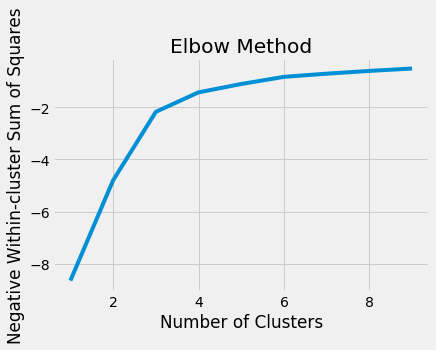

In [110]:
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)

#elbow method 
number_clusters = range(1, 10)

kmeans = [KMeans(n_clusters=i, max_iter = 1000) for i in number_clusters]
kmeans

score = [kmeans[i].fit(Y_sklearn).score(Y_sklearn) for i in range(len(kmeans))]
score

plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Negative Within-cluster Sum of Squares')
plt.title('Elbow Method')
plt.show()

Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Running Model Iteration 600 
Running Model Iteration 700 
Running Model Iteration 800 
Running Model Iteration 900 
Model finished running


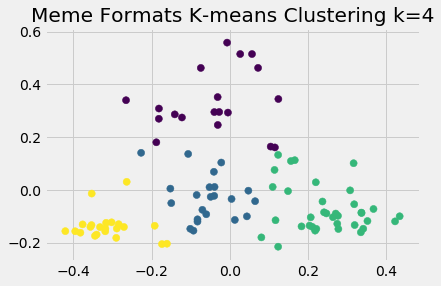

In [111]:
test_e = Kmeans(4, 1, 1000) #KMeans(n_clusters=6, max_iter = 1000) 
fitted = test_e.fit_kmeans(Y_sklearn)
predicted_values = test_e.predict(Y_sklearn)

plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=predicted_values, s=50, cmap='viridis') #s =50

centers = fitted.centroids
plt.title('Meme Formats K-means Clustering k=4')
plt.show()
#plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6);

In [112]:
cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []
cluster5 = []
cluster6 = []
for i in range(len(predicted_values)):
    if predicted_values[i] ==0:
        cluster1.append(memes_count.most_common()[i][0])
        
    elif predicted_values[i] ==1:
        cluster2.append(memes_count.most_common()[i][0])
    elif predicted_values[i] ==2:
        cluster3.append(memes_count.most_common()[i][0])
    elif predicted_values[i] ==3:
        cluster4.append(memes_count.most_common()[i][0])
    elif predicted_values[i] ==4:
        cluster5.append(memes_count.most_common()[i][0])
    elif predicted_values[i] ==5:
        cluster6.append(memes_count.most_common()[i][0])

In [113]:
cluster1

['Expanding-Brain.json',
 'Two-Buttons.json',
 'Change-My-Mind.json',
 'Blank-Nut-Button.json',
 'The-Scroll-Of-Truth.json',
 'Left-Exit-12-Off-Ramp.json',
 'Surprised-Pikachu.json',
 'Jack-Sparrow-Being-Chased.json',
 'Is-This-A-Pigeon.json',
 'Running-Away-Balloon.json',
 'Drake-Hotline-Bling.json',
 'Tuxedo-Winnie-The-Pooh.json',
 'Spongebob-Ight-Imma-Head-Out.json',
 'Marked-Safe-From.json',
 'Who-Would-Win.json',
 'Who-Killed-Hannibal.json',
 'UNO-Draw-25-Cards.json',
 'Epic-Handshake.json',
 'Monkey-Puppet.json']

In [114]:
cluster2

['Batman-Slapping-Robin.json',
 'Leonardo-Dicaprio-Cheers.json',
 'Mocking-Spongebob.json',
 'Disaster-Girl.json',
 'Grandma-Finds-The-Internet.json',
 'Ill-Just-Wait-Here.json',
 'Unsettled-Tom.json',
 'Finding-Neverland.json',
 'Third-World-Success-Kid.json',
 'Put-It-Somewhere-Else-Patrick.json',
 'Star-Wars-Yoda.json',
 'Evil-Kermit.json',
 'Sparta-Leonidas.json',
 'Oprah-You-Get-A.json',
 'Mugatu-So-Hot-Right-Now.json',
 'This-Is-Where-Id-Put-My-Trophy-If-I-Had-One.json',
 'Trump-Bill-Signing.json',
 'I-Should-Buy-A-Boat-Cat.json',
 'Hard-To-Swallow-Pills.json',
 'Uncle-Sam.json',
 'Archer.json',
 'Bernie-I-Am-Once-Again-Asking-For-Your-Support.json']

In [115]:
cluster3

['Bad-Luck-Brian.json',
 'Philosoraptor.json',
 'Boardroom-Meeting-Suggestion.json',
 'First-World-Problems.json',
 'The-Most-Interesting-Man-In-The-World.json',
 'Bad-Pun-Dog.json',
 'Creepy-Condescending-Wonka.json',
 'Grumpy-Cat.json',
 'Y-U-No.json',
 'The-Rock-Driving.json',
 'Waiting-Skeleton.json',
 '10-Guy.json',
 'Captain-Picard-Facepalm.json',
 'Matrix-Morpheus.json',
 'Third-World-Skeptical-Kid.json',
 'Confession-Bear.json',
 'Am-I-The-Only-One-Around-Here.json',
 'Success-Kid.json',
 'Hide-the-Pain-Harold.json',
 'Roll-Safe-Think-About-It.json',
 'Evil-Toddler.json',
 'Awkward-Moment-Sealion.json',
 'Face-You-Make-Robert-Downey-Jr.json',
 'Back-In-My-Day.json',
 'Conspiracy-Keanu.json',
 'Picard-Wtf.json',
 'Woman-Yelling-At-Cat.json',
 'Black-Girl-Wat.json',
 'Skeptical-Baby.json',
 'X-All-The-Y.json',
 'Scumbag-Steve.json',
 'Laughing-Men-In-Suits.json',
 'American-Chopper-Argument.json',
 'Dr-Evil-Laser.json',
 'See-Nobody-Cares.json',
 'Steve-Harvey.json']

In [116]:
cluster4

['One-Does-Not-Simply.json',
 'Futurama-Fry.json',
 'X-X-Everywhere.json',
 'But-Thats-None-Of-My-Business.json',
 'Ancient-Aliens.json',
 'That-Would-Be-Great.json',
 'Dont-You-Squidward.json',
 'Inhaling-Seagull.json',
 'Brace-Yourselves-X-is-Coming.json',
 'And-everybody-loses-their-minds.json',
 'Doge.json',
 'Too-Damn-High.json',
 'Be-Like-Bill.json',
 'Aaaaand-Its-Gone.json',
 'Say-That-Again-I-Dare-You.json',
 'Aint-Nobody-Got-Time-For-That.json',
 'Maury-Lie-Detector.json',
 'Yall-Got-Any-More-Of-That.json',
 'Yo-Dawg-Heard-You.json',
 'Imagination-Spongebob.json',
 'Look-At-Me.json',
 'Sad-Pablo-Escobar.json']

In [117]:
#number of cluster 
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 15 scores
        features = tf_idf_vectorizor.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

In [118]:
dfs = get_top_features_cluster(tf_idf_array, predicted_values, 15) #x array, prediction, number of words
dfs


[      features     score
 0      fortnit  0.238685
 1   coronaviru  0.154269
 2    minecraft  0.134790
 3       corona  0.085062
 4        covid  0.075005
 5         viru  0.066253
 6        brain  0.059778
 7       button  0.056603
 8     pewdiepi  0.048190
 9        human  0.046322
 10      normal  0.045840
 11      player  0.045705
 12     depress  0.045208
 13      boomer  0.043905
 14        area  0.043279,    features     score
 0   fortnit  0.066904
 1       son  0.053021
 2      vote  0.050561
 3      must  0.047343
 4        ye  0.045961
 5      wall  0.041569
 6     cheer  0.039331
 7      danc  0.038738
 8      shut  0.038635
 9      burn  0.035858
 10  chicken  0.035774
 11     move  0.035497
 12     even  0.035006
 13    thank  0.034420
 14    could  0.034045,     features     score
 0       even  0.087267
 1       vote  0.079437
 2      could  0.078897
 3    hillari  0.069858
 4     moment  0.064146
 5         ye  0.061954
 6       joke  0.058340
 7    thought  0.058312


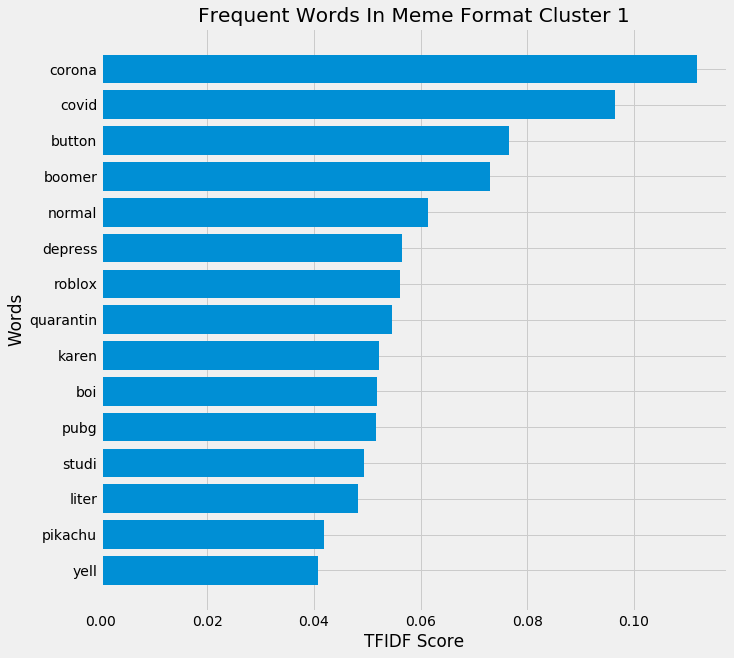

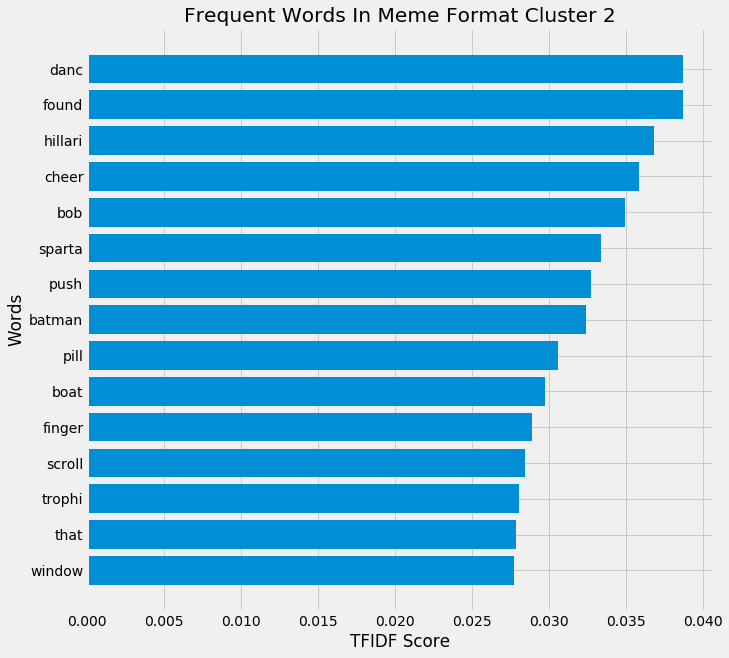

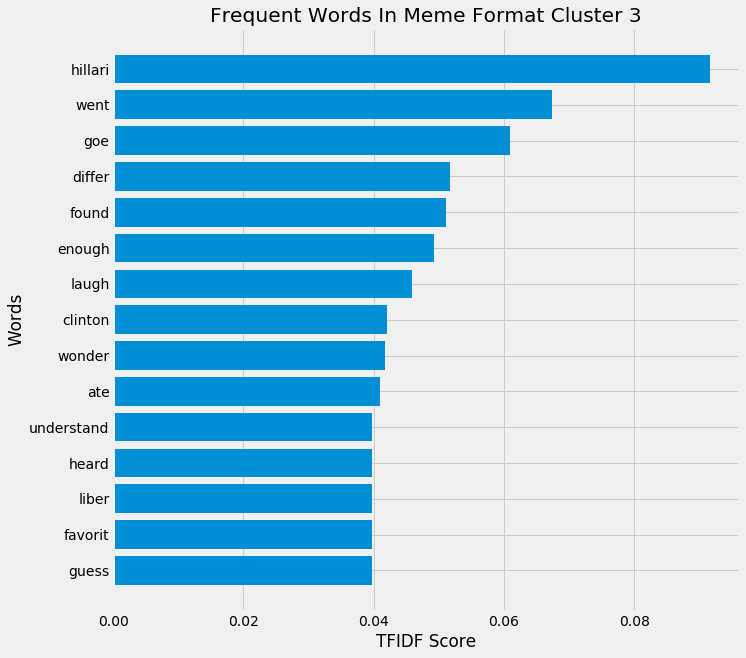

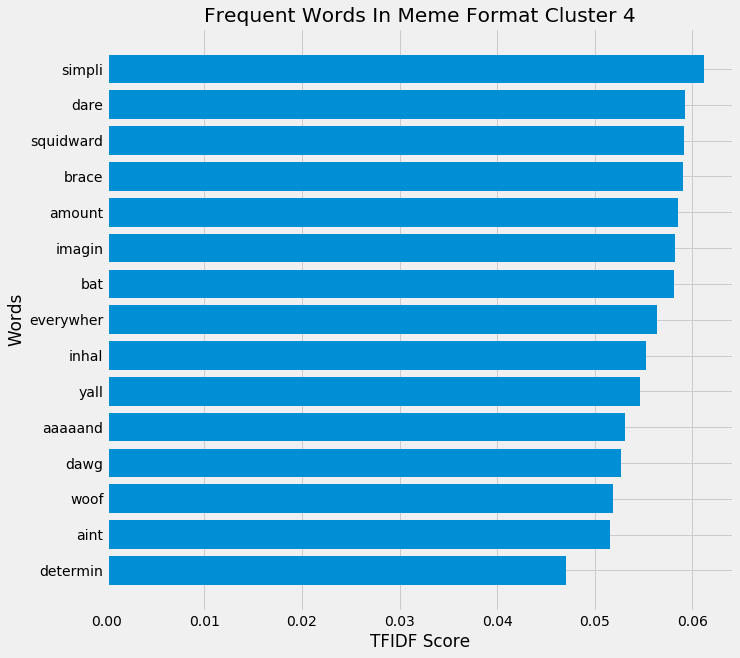

In [100]:
#barplot for each cluster
for i in range(len(dfs)):  
    fig = plt.figure(figsize=(10, 10))
    score = dfs[i]['score'][::-1]
    freqword = dfs[i]["features"][::-1]
    plt.barh(freqword , score)
    plt.title('Frequent Words In Meme Format Cluster ' + str(i+1))
    plt.ylabel("Words")
    plt.xlabel("TFIDF Score")
    plt.show()

Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Running Model Iteration 600 
Running Model Iteration 700 
Running Model Iteration 800 
Running Model Iteration 900 
Model finished running


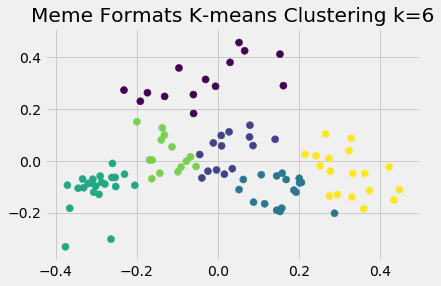

In [185]:
#k=6
test_e = Kmeans(6, 1, 1000) #KMeans(n_clusters=6, max_iter = 1000) 
fitted = test_e.fit_kmeans(Y_sklearn)
predicted_values = test_e.predict(Y_sklearn)

plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=predicted_values, s=50, cmap='viridis') #s =50

centers = fitted.centroids
plt.title('Meme Formats K-means Clustering k=6')
plt.show()
#plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6);

Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Running Model Iteration 600 
Running Model Iteration 700 
Running Model Iteration 800 
Running Model Iteration 900 
Model finished running


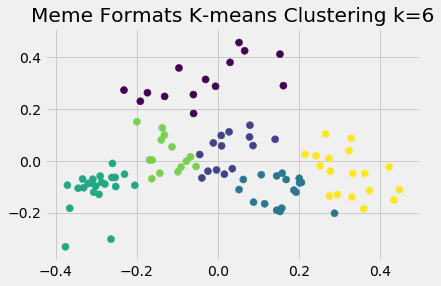

In [186]:
#k=6
#sklearn_pca = PCA(n_components = 2)
#Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
test_e = Kmeans(6, 1, 1000) #KMeans(n_clusters=6, max_iter = 1000) 
fitted = test_e.fit_kmeans(Y_sklearn)
predicted_values = test_e.predict(Y_sklearn)

plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=predicted_values, s=50, cmap='viridis') #s =50

centers = fitted.centroids
plt.title('Meme Formats K-means Clustering')
#plt.ylabel("TFIDF Score")
#plt.xlabel("Words")
plt.show()
#plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6);

In [187]:
predicted_values

array([2, 3, 5, 1, 5, 5, 2, 4, 5, 3, 0, 0, 3, 3, 5, 2, 5, 5, 5, 3, 0, 3,
       5, 5, 5, 5, 5, 2, 2, 5, 5, 2, 2, 5, 1, 2, 0, 3, 3, 2, 2, 3, 5, 5,
       1, 3, 3, 4, 0, 1, 2, 2, 1, 1, 2, 3, 1, 0, 0, 1, 4, 2, 3, 4, 1, 0,
       0, 3, 2, 1, 3, 3, 1, 4, 1, 3, 2, 4, 4, 1, 3, 3, 3, 4, 1, 3, 0, 2,
       4, 0, 0, 4, 0, 4, 0, 4, 4, 4, 3])

In [188]:
memes_count.most_common()[0][0]

'Bad-Luck-Brian.json'

In [189]:
cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []
cluster5 = []
cluster6 = []
for i in range(len(predicted_values)):
    if predicted_values[i] ==0:
        cluster1.append(memes_count.most_common()[i][0])
        
    elif predicted_values[i] ==1:
        cluster2.append(memes_count.most_common()[i][0])
    elif predicted_values[i] ==2:
        cluster3.append(memes_count.most_common()[i][0])
    elif predicted_values[i] ==3:
        cluster4.append(memes_count.most_common()[i][0])
    elif predicted_values[i] ==4:
        cluster5.append(memes_count.most_common()[i][0])
    elif predicted_values[i] ==5:
        cluster6.append(memes_count.most_common()[i][0])
        

#memes_count = Counter(STATS['memes'])
#print(len(STATS['memes']))
#for f, c in memes_count.most_common():
#    print(f)
    #print(f, c)

In [190]:
cluster1

['Expanding-Brain.json',
 'Two-Buttons.json',
 'Change-My-Mind.json',
 'Blank-Nut-Button.json',
 'Left-Exit-12-Off-Ramp.json',
 'Is-This-A-Pigeon.json',
 'Running-Away-Balloon.json',
 'Drake-Hotline-Bling.json',
 'Tuxedo-Winnie-The-Pooh.json',
 'Marked-Safe-From.json',
 'Who-Would-Win.json',
 'Who-Killed-Hannibal.json',
 'UNO-Draw-25-Cards.json',
 'Epic-Handshake.json']

In [191]:
cluster2

['Boardroom-Meeting-Suggestion.json',
 'Mocking-Spongebob.json',
 'Woman-Yelling-At-Cat.json',
 'Unsettled-Tom.json',
 'Third-World-Success-Kid.json',
 'Surprised-Pikachu.json',
 'Jack-Sparrow-Being-Chased.json',
 'X-All-The-Y.json',
 'Be-Like-Bill.json',
 'American-Chopper-Argument.json',
 'Evil-Kermit.json',
 'Oprah-You-Get-A.json',
 'Trump-Bill-Signing.json',
 'Spongebob-Ight-Imma-Head-Out.json']

In [192]:
cluster3

['Bad-Luck-Brian.json',
 'The-Most-Interesting-Man-In-The-World.json',
 'Grumpy-Cat.json',
 'Am-I-The-Only-One-Around-Here.json',
 'Success-Kid.json',
 'Evil-Toddler.json',
 'Awkward-Moment-Sealion.json',
 'Disaster-Girl.json',
 'Back-In-My-Day.json',
 'Grandma-Finds-The-Internet.json',
 'Black-Girl-Wat.json',
 'Finding-Neverland.json',
 'Skeptical-Baby.json',
 'Scumbag-Steve.json',
 'Laughing-Men-In-Suits.json',
 'Dr-Evil-Laser.json',
 'Steve-Harvey.json']

In [193]:
cluster4

['One-Does-Not-Simply.json',
 'X-X-Everywhere.json',
 'But-Thats-None-Of-My-Business.json',
 'Ancient-Aliens.json',
 'Waiting-Skeleton.json',
 'Leonardo-Dicaprio-Cheers.json',
 'Dont-You-Squidward.json',
 'Inhaling-Seagull.json',
 'Brace-Yourselves-X-is-Coming.json',
 'And-everybody-loses-their-minds.json',
 'Ill-Just-Wait-Here.json',
 'Doge.json',
 'Too-Damn-High.json',
 'Aaaaand-Its-Gone.json',
 'Say-That-Again-I-Dare-You.json',
 'Aint-Nobody-Got-Time-For-That.json',
 'Maury-Lie-Detector.json',
 'Yall-Got-Any-More-Of-That.json',
 'See-Nobody-Cares.json',
 'Yo-Dawg-Heard-You.json',
 'Imagination-Spongebob.json',
 'Sad-Pablo-Escobar.json']

In [194]:
cluster5

['Batman-Slapping-Robin.json',
 'The-Scroll-Of-Truth.json',
 'Put-It-Somewhere-Else-Patrick.json',
 'Star-Wars-Yoda.json',
 'Sparta-Leonidas.json',
 'Mugatu-So-Hot-Right-Now.json',
 'This-Is-Where-Id-Put-My-Trophy-If-I-Had-One.json',
 'I-Should-Buy-A-Boat-Cat.json',
 'Hard-To-Swallow-Pills.json',
 'Uncle-Sam.json',
 'Archer.json',
 'Look-At-Me.json',
 'Bernie-I-Am-Once-Again-Asking-For-Your-Support.json',
 'Monkey-Puppet.json']

In [195]:
cluster6

['Philosoraptor.json',
 'Futurama-Fry.json',
 'First-World-Problems.json',
 'Bad-Pun-Dog.json',
 'Creepy-Condescending-Wonka.json',
 'Y-U-No.json',
 'The-Rock-Driving.json',
 'That-Would-Be-Great.json',
 '10-Guy.json',
 'Captain-Picard-Facepalm.json',
 'Matrix-Morpheus.json',
 'Third-World-Skeptical-Kid.json',
 'Confession-Bear.json',
 'Hide-the-Pain-Harold.json',
 'Roll-Safe-Think-About-It.json',
 'Face-You-Make-Robert-Downey-Jr.json',
 'Conspiracy-Keanu.json',
 'Picard-Wtf.json']

In [196]:
#number of cluster 
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 15 scores
        features = tf_idf_vectorizor.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

In [197]:
dfs = get_top_features_cluster(tf_idf_array, predicted_values, 20) #x array, prediction, number of words

In [198]:
dfs

[      features     score
 0       corona  0.097331
 1        covid  0.085888
 2       button  0.080644
 3       normal  0.060139
 4       roblox  0.059670
 5         pubg  0.059322
 6          boi  0.048269
 7           51  0.047242
 8   depression  0.045251
 9    literally  0.043781
 10        2019  0.043479
 11  quarantine  0.042805
 12      buying  0.042749
 13        mind  0.042726
 14   butterfly  0.042632
 15        apex  0.041098
 16         nut  0.039652
 17       crush  0.038898
 18   happiness  0.037975
 19     players  0.036479,      features     score
 0     finally  0.070639
 1         bob  0.056359
 2        also  0.055741
 3       dance  0.055121
 4       ideas  0.052593
 5      starts  0.049555
 6     yelling  0.043760
 7      corona  0.041647
 8       chair  0.041055
 9     pikachu  0.040903
 10     father  0.038513
 11       goes  0.037676
 12  spongebob  0.037359
 13     kermit  0.036587
 14      opens  0.033490
 15       lets  0.032589
 16    alright  0.032551
 17 

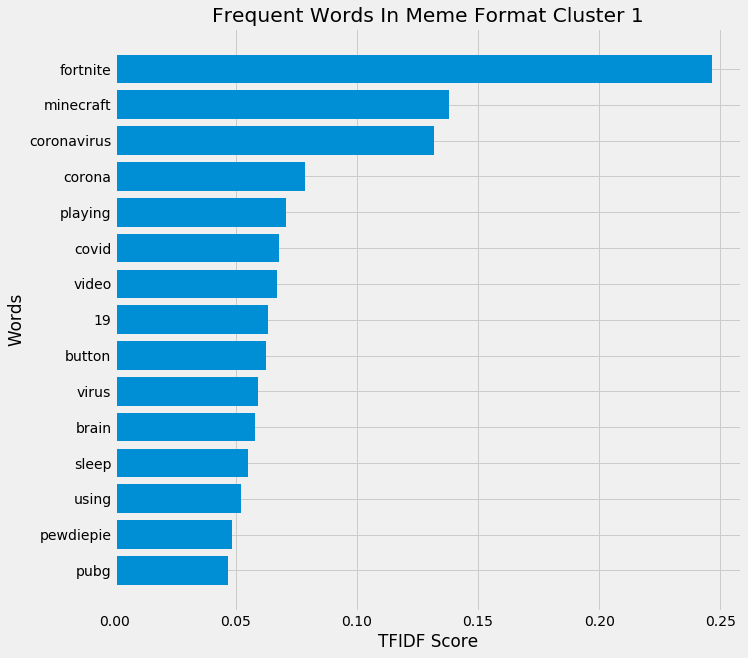

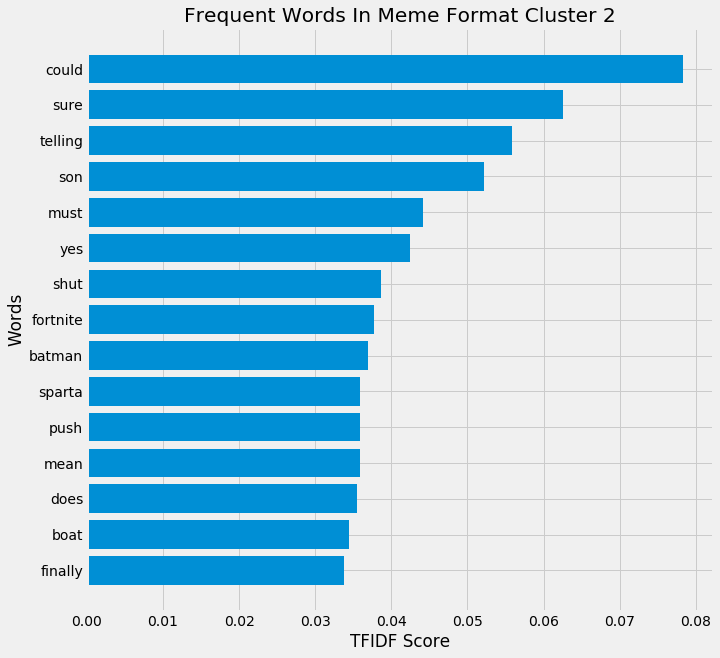

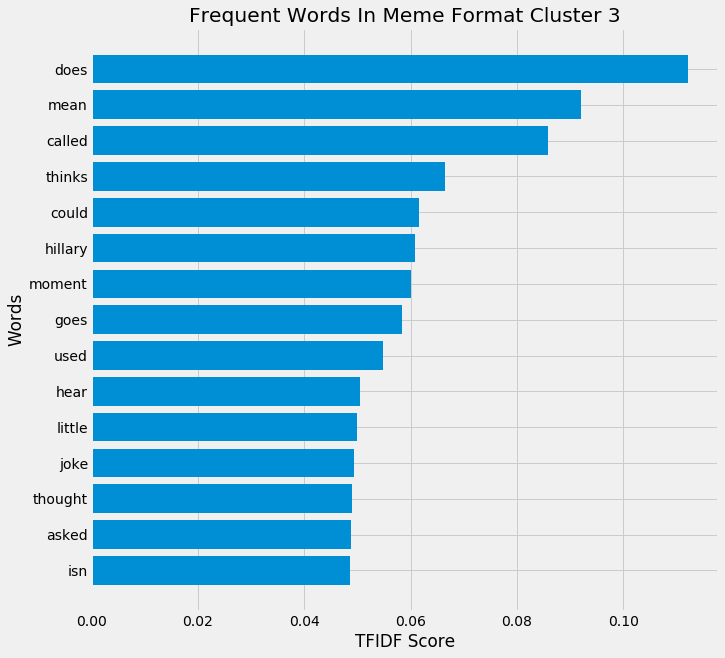

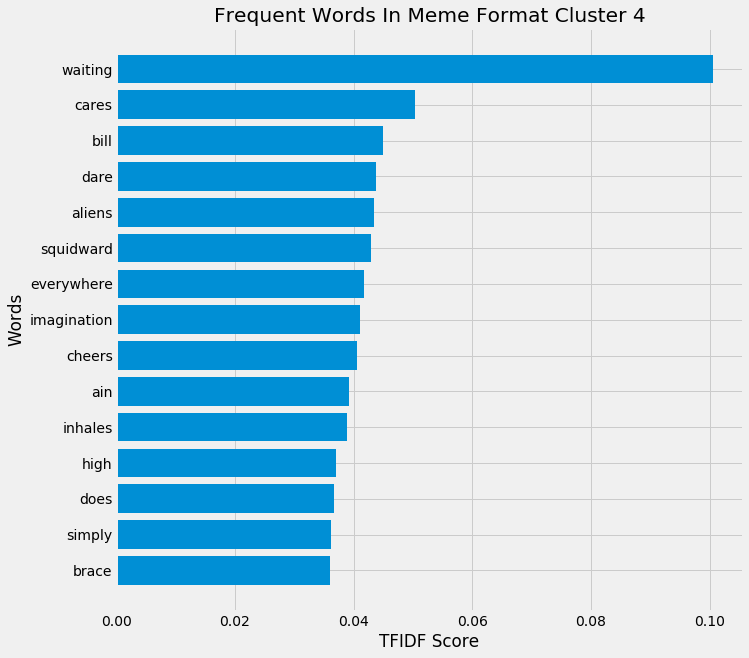

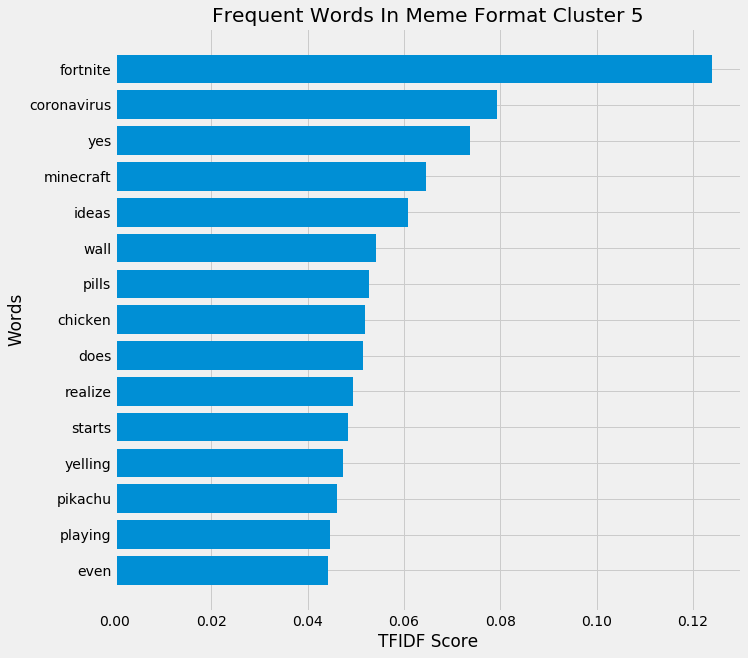

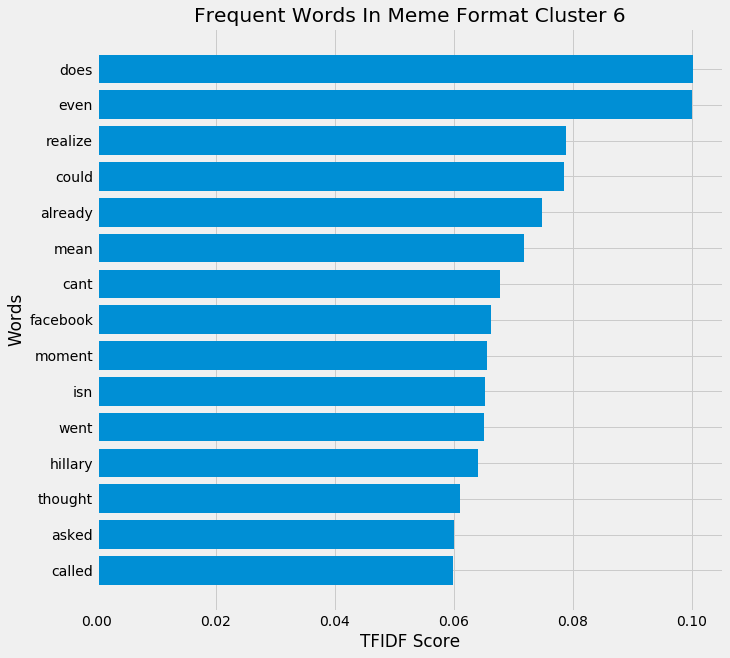

In [128]:
#barplot for each cluster
for i in range(len(dfs)):  
    fig = plt.figure(figsize=(10, 10))
    score = dfs[i]['score'][::-1]
    freqword = dfs[i]["features"][::-1]
    plt.barh(freqword , score)
    plt.title('Frequent Words In Meme Format Cluster ' + str(i+1))
    plt.ylabel("Words")
    plt.xlabel("TFIDF Score")
    plt.show()
    

Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Running Model Iteration 600 
Running Model Iteration 700 
Running Model Iteration 800 
Running Model Iteration 900 
Model finished running


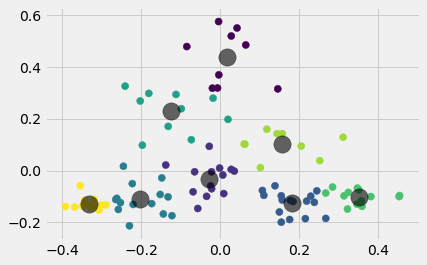

In [129]:
#k=8
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
test_e = Kmeans(8, 1, 1000) #KMeans(n_clusters=6, max_iter = 1000) 
fitted = test_e.fit_kmeans(Y_sklearn)
predicted_values = test_e.predict(Y_sklearn)

plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=predicted_values, s=50, cmap='viridis') #s =50

centers = fitted.centroids
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6);

In [130]:
predicted_values

array([2, 3, 2, 6, 3, 5, 2, 1, 2, 7, 0, 0, 3, 3, 5, 2, 6, 5, 3, 7, 0, 3,
       5, 5, 5, 1, 5, 2, 5, 5, 6, 2, 2, 5, 6, 2, 0, 3, 3, 2, 2, 7, 5, 5,
       6, 7, 3, 4, 0, 1, 5, 1, 1, 6, 2, 3, 6, 0, 0, 6, 3, 2, 7, 1, 7, 0,
       0, 7, 2, 6, 7, 7, 1, 1, 1, 7, 2, 1, 1, 1, 3, 7, 7, 1, 4, 7, 4, 2,
       4, 4, 4, 1, 4, 3, 4, 3, 4, 4, 7])

In [131]:
dfs = get_top_features_cluster(tf_idf_array, predicted_values, 20) #x array, prediction, number of words
dfs

[       features     score
 0      fortnite  0.294513
 1     minecraft  0.175333
 2   coronavirus  0.105648
 3        button  0.098718
 4       playing  0.098316
 5         video  0.089625
 6         brain  0.084248
 7         sleep  0.079136
 8         using  0.077590
 9         covid  0.071840
 10       corona  0.066307
 11           19  0.066133
 12       roblox  0.061577
 13       normal  0.060092
 14        anime  0.059518
 15    butterfly  0.058998
 16         pubg  0.057179
 17         mind  0.051432
 18        virus  0.050815
 19          nut  0.050322,     features     score
 0    telling  0.073229
 1        son  0.067531
 2       must  0.061317
 3        yes  0.058498
 4   fortnite  0.054909
 5     sparta  0.048716
 6       wall  0.048369
 7     batman  0.047670
 8       boat  0.046575
 9       shut  0.045945
 10    trophy  0.042159
 11   finally  0.041857
 12      does  0.038522
 13      vote  0.037097
 14      even  0.036086
 15      mean  0.036035
 16    kermit  0.035757
 